# Natural Language Processing Project

In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started!

## Imports

In [1]:
import pandas as pd
import numpy as np

## The Data

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
# yelp['text length'] = yelp['text'].apply(len)
yelp['text length'] = yelp['text'].apply(lambda text: len(text))

In [7]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


# EDA

Let's explore the data

## Imports

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

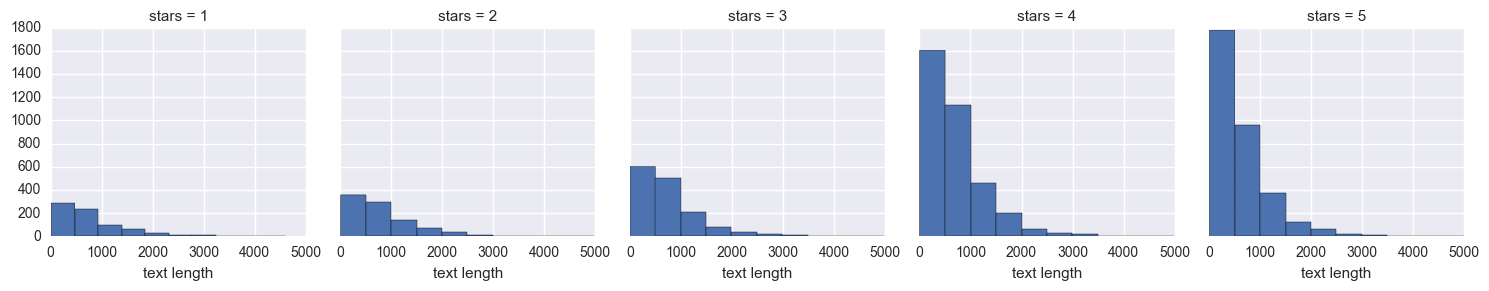

In [9]:
g = sns.FacetGrid(data=yelp, col='stars')
g = g.map(plt.hist, 'text length')

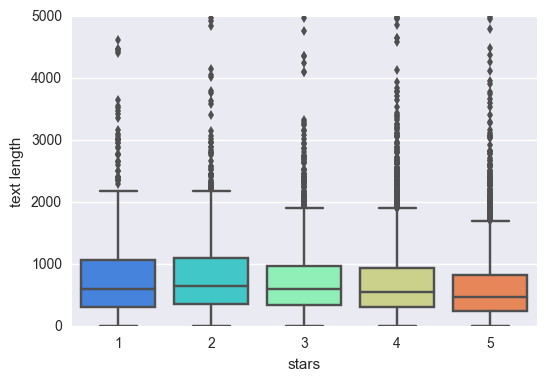

In [10]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

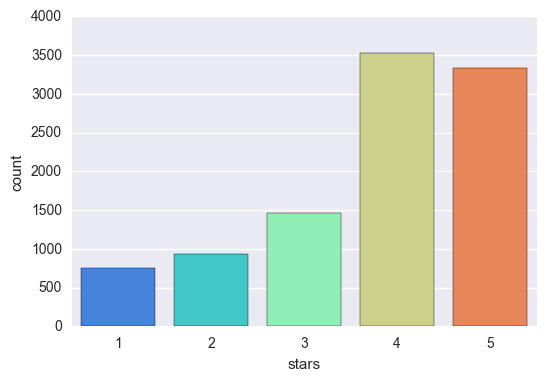

In [11]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [12]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.524700
2,0.719525,1.563107,0.875944,842.265372
3,0.788501,1.306639,0.694730,758.505133
4,0.954623,1.395916,0.670448,712.944129
5,0.944261,1.381780,0.608631,625.015583


In [13]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857651
useful,-0.743329,1.000000,0.894506,0.699895
funny,-0.944939,0.894506,1.000000,0.843463
text length,-0.857651,0.699895,0.843463,1.000000


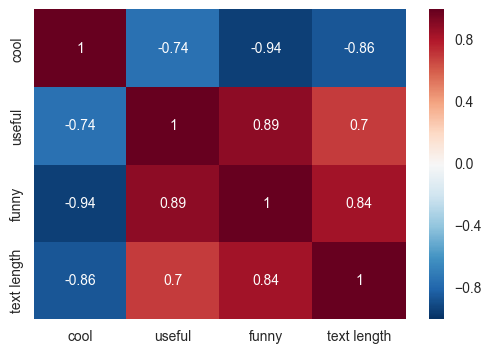

In [14]:
sns.heatmap(stars.corr(), annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

In [15]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
# yelp_class.head()

In [16]:
X = yelp_class['text']
y = yelp_class['stars']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [18]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Model

Time to train a model!

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [22]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

Time to see how our model did!

In [23]:
nb_pred = nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test, nb_pred))
print('\n')
print(classification_report(y_test, nb_pred))

[[156  77]
 [ 37 956]]


             precision    recall  f1-score   support

          1       0.81      0.67      0.73       233
          5       0.93      0.96      0.94       993

avg / total       0.90      0.91      0.90      1226



# Using Text Processing

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
pipeline = Pipeline([
        ('cv', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('mnb', MultinomialNB())
    ])

## Using the Pipeline

### Train Test Split

In [29]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...False,
         use_idf=True)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [31]:
predictions = pipeline.predict(X_test)

In [32]:
print(confusion_matrix(y_test, nb_pred))
print('\n')
print(classification_report(y_test, nb_pred))

[[156  77]
 [ 37 956]]


             precision    recall  f1-score   support

          1       0.81      0.67      0.73       233
          5       0.93      0.96      0.94       993

avg / total       0.90      0.91      0.90      1226

